In [1]:
#1. 파일불러서 datagram 생성
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('C:/Users/User/Downloads/Raisin_Dataset.csv')
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [2]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [3]:
#2. 결측치 제거
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'Label')

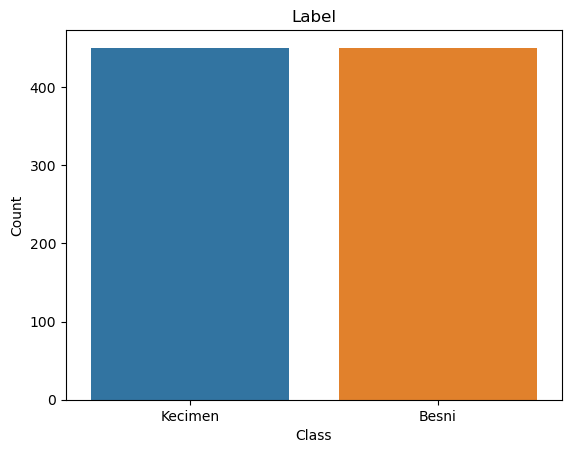

In [4]:
#3. 라벨링 그래프 표시 (라벨링 = class)
sns.countplot(data = data, x="Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [5]:
#Splitting the data into training and test test
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [6]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, ...,
        9.05460000e+04, 7.58650579e-01, 1.18404000e+03],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, ...,
        7.87890000e+04, 6.84129570e-01, 1.12178600e+03],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, ...,
        9.37170000e+04, 6.37612812e-01, 1.20857500e+03],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, ...,
        1.06264000e+05, 7.41098519e-01, 1.29282800e+03],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, ...,
        9.76530000e+04, 6.58798253e-01, 1.25854800e+03],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, ...,
        8.91970000e+04, 6.32019963e-01, 1.27286200e+03]])

In [7]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [9]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                352       
                                                                 
 dense_1 (Dense)             (None, 20)                900       
                                                                 
 dense_2 (Dense)             (None, 16)                336       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1,622
Trainable params: 1,622
Non-trainable params: 0
_________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 17ms/step - loss: 3815.7781 - accuracy: 0.4986 - val_loss: 281.4749 - val_accuracy: 0.4611
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 221.6133 - accuracy: 0.4889 - val_loss: 144.5924 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 269.4836 - accuracy: 0.4514 - val_loss: 205.0071 - val_accuracy: 0.4611
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 238.9399 - accuracy: 0.5125 - val_loss: 163.8103 - val_accuracy: 0.5389
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 158.2419 - accuracy: 0.5208 - val_loss: 206.4966 - val_accuracy: 0.5389
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 215.9547 - accuracy: 0.5306 - val_loss: 286.4066 - val_accuracy: 0.5389
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 167.5224 - accuracy: 0.5069 - val_loss: 122.6623 - val_

Epoch 58/100
23/23 [==============================] - 0s 4ms/step - loss: 9.0091 - accuracy: 0.7847 - val_loss: 8.2338 - val_accuracy: 0.8333
Epoch 59/100
23/23 [==============================] - 0s 4ms/step - loss: 7.8854 - accuracy: 0.7847 - val_loss: 6.4716 - val_accuracy: 0.8667
Epoch 60/100
23/23 [==============================] - 0s 4ms/step - loss: 5.9952 - accuracy: 0.8125 - val_loss: 8.1284 - val_accuracy: 0.8333
Epoch 61/100
23/23 [==============================] - 0s 6ms/step - loss: 6.2692 - accuracy: 0.8167 - val_loss: 6.6098 - val_accuracy: 0.8500
Epoch 62/100
23/23 [==============================] - 0s 5ms/step - loss: 7.5988 - accuracy: 0.7944 - val_loss: 6.1530 - val_accuracy: 0.8611
Epoch 63/100
23/23 [==============================] - 0s 6ms/step - loss: 4.9475 - accuracy: 0.8250 - val_loss: 6.7057 - val_accuracy: 0.8611
Epoch 64/100
23/23 [==============================] - 0s 5ms/step - loss: 8.3746 - accuracy: 0.7833 - val_loss: 6.4937 - val_accuracy: 0.8222
Epoch 

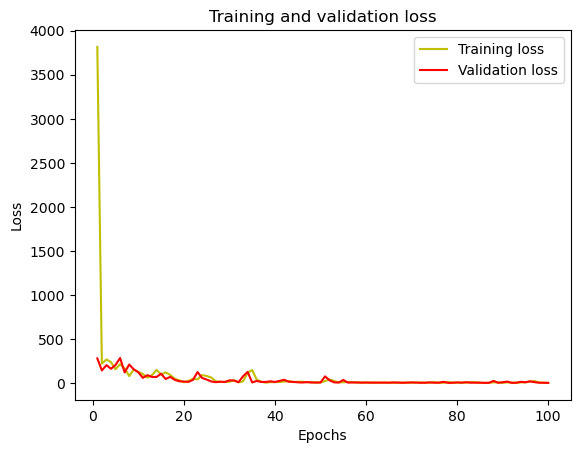

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

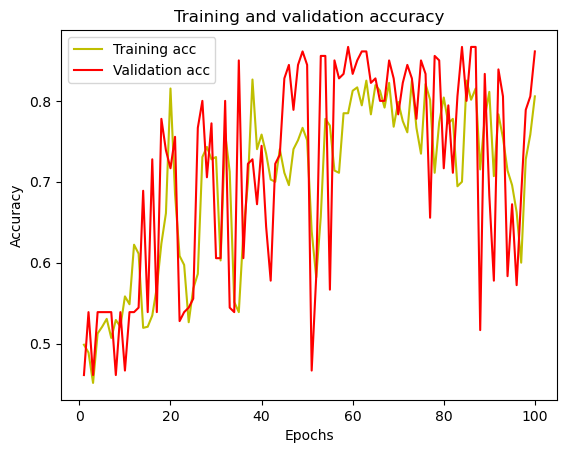

In [12]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        97
           1       0.79      0.95      0.86        83

    accuracy                           0.86       180
   macro avg       0.87      0.87      0.86       180
weighted avg       0.88      0.86      0.86       180

[[76 21]
 [ 4 79]]
